<a href="https://colab.research.google.com/github/NanduB26/MAT-421/blob/main/rlbandi1_modJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MAT 421 Module J: Sections 4.1 and 4.2 HW (Optional)

##Laplacian Matrix

Given an undirected graph with 4 nodes and edges with weights as follows:

(0, 1) with weight 2

(0, 2) with weight 3

(1, 3) with weight 1

(2, 3) with weight 4

Construct the Laplacian matrix
𝐿 of the graph and verify that it is symmetric and positive semi-definite.

In [1]:
import numpy as np
from numpy.linalg import eigvals

# number of nodes
n = 4

# weighted adjacency matrix
A = np.array([
    [0, 2, 3, 0],
    [2, 0, 0, 1],
    [3, 0, 0, 4],
    [0, 1, 4, 0]
])

# degree matrix
D = np.diag(np.sum(A, axis=1))

# laplacian matrix
L = D - A

print("Laplacian matrix L:\n", L)

# check symmetry
print("\nL is symmetric:", np.allclose(L, L.T))

# check positive semi-definiteness
eigenvalues = eigvals(L)
print("Eigenvalues of L:", eigenvalues)
print("L is positive semi-definite:", np.all(eigenvalues >= -1e-10))  # small tolerance for floating point errors


Laplacian matrix L:
 [[ 5 -2 -3  0]
 [-2  3  0 -1]
 [-3  0  7 -4]
 [ 0 -1 -4  5]]

L is symmetric: True
Eigenvalues of L: [ 1.13021868e+01 -6.06285855e-16  5.45221889e+00  3.24559429e+00]
L is positive semi-definite: True


Prove that for any vector
𝑥, the Laplacian quadratic form
𝑥^𝑇 𝐿𝑥 equals the sum over all edges
(𝑖, 𝑗) of 𝑤 i,j (𝑥i - 𝑥j)^2, using the same graph as the previous question.



In [2]:
# vector can be random or chosen
x = np.array([1, 2, 3, 4])
xTLx = x.T @ L @ x

# manually compute
manual_sum = 0
edges = [(0,1,2), (0,2,3), (1,3,1), (2,3,4)]
for i, j, w in edges:
    manual_sum += w * (x[i] - x[j])**2

print("x^T L x =", xTLx)
print("Manual sum over edges =", manual_sum)
print("Are they equal?", np.isclose(xTLx, manual_sum))

x^T L x = 22
Manual sum over edges = 22
Are they equal? True


##Spectral Graph Bipartitioning

Given the following undirected unweighted graph with 6 nodes and edges:

(0,1), (0,2), (1,2), (3,4), (4,5), (3,5)

Use the second smallest eigenvector (Fiedler vector) of the Laplacian matrix to bipartition the graph. Which nodes belong to each partition?

Fiedler vector: [0.         0.         0.         0.57735027 0.57735027 0.57735027]
Partition 1: [0, 1, 2, 3, 4, 5]
Partition 2: []


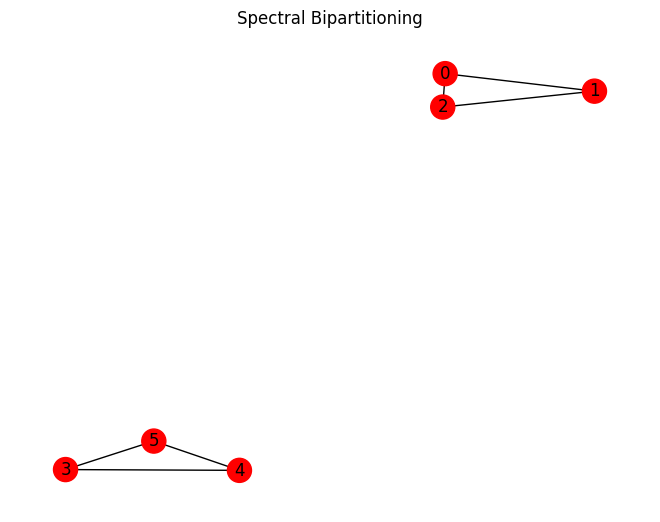

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# create graph
G = nx.Graph()
edges = [(0,1), (0,2), (1,2), (3,4), (4,5), (3,5)]
G.add_edges_from(edges)

# get Laplacian matrix
L = nx.laplacian_matrix(G).toarray()

# compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigh(L)

# fiedler vector is the second eigenvector
fiedler_vector = eigenvectors[:, 1]

# bipartitioning
partition1 = [i for i, val in enumerate(fiedler_vector) if val >= 0]
partition2 = [i for i, val in enumerate(fiedler_vector) if val < 0]

print("Fiedler vector:", fiedler_vector)
print("Partition 1:", partition1)
print("Partition 2:", partition2)

# visualization
colors = ['red' if i in partition1 else 'blue' for i in G.nodes()]
nx.draw(G, with_labels=True, node_color=colors)
plt.title("Spectral Bipartitioning")
plt.show()

Demonstrate how the value of the Rayleigh Quotient relates to the quality of a partition using the Fiedler vector for the graph in the previous question.

In [4]:
# compute Rayleigh Quotient
numerator = fiedler_vector.T @ L @ fiedler_vector
denominator = fiedler_vector.T @ fiedler_vector
rayleigh_quotient = numerator / denominator

print("Rayleigh Quotient using Fiedler vector:", rayleigh_quotient)

# compare with eigenvalues
print("Second smallest eigenvalue (λ2):", eigenvalues[1])


Rayleigh Quotient using Fiedler vector: 7.395570986446991e-31
Second smallest eigenvalue (λ2): 2.220446049250313e-15
